Following https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

### Download data

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
# Set batch size
batch_size = 4

# Create trainloader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Create testloader
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Define list of classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Print some images to check

In [5]:
for x, y in trainloader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([4, 3, 32, 32])
torch.Size([4])


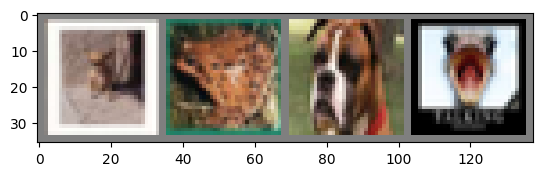

dog   frog  dog   bird 


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Import CNN class and create instance

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
from cnn import Net

net = Net()

### Training

Define loss function and optimizer

In [9]:
import torch.optim as optim

# Loss criterion
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train loop

In [10]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)  # this will output unnormalized logits
        loss = criterion(outputs, labels)  # this will calc the cross entropy loss; nn.CrossEntropyLoss takes unnormalized logits
        loss.backward()  # this will compute gradients backwards
        optimizer.step()  # this will apply the gradients (i.e. change the weights based on computed gradients)

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.264
[1,  4000] loss: 1.925
[1,  6000] loss: 1.716
[1,  8000] loss: 1.587
[1, 10000] loss: 1.536
[1, 12000] loss: 1.465
[2,  2000] loss: 1.388
[2,  4000] loss: 1.363
[2,  6000] loss: 1.315
[2,  8000] loss: 1.325
[2, 10000] loss: 1.285
[2, 12000] loss: 1.265
[3,  2000] loss: 1.188
[3,  4000] loss: 1.189
[3,  6000] loss: 1.172
[3,  8000] loss: 1.184
[3, 10000] loss: 1.190
[3, 12000] loss: 1.160
[4,  2000] loss: 1.079
[4,  4000] loss: 1.106
[4,  6000] loss: 1.099
[4,  8000] loss: 1.078
[4, 10000] loss: 1.098
[4, 12000] loss: 1.091
[5,  2000] loss: 1.006
[5,  4000] loss: 1.038
[5,  6000] loss: 1.022
[5,  8000] loss: 1.000
[5, 10000] loss: 1.036
[5, 12000] loss: 1.036
Finished Training


Save the trained model

In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the trained model

Test one sample

In [12]:
dataiter = iter(testloader)


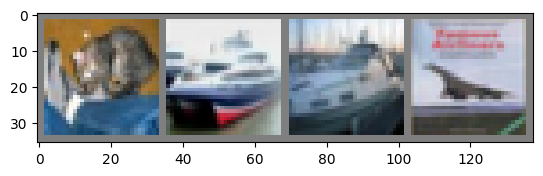

In [13]:
# print images
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

In [14]:
# Print ground truth
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

GroundTruth:  cat   ship  ship  plane


In [15]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [16]:
outputs = net(images) 

values, indices = torch.max(outputs, dim=1)

print('Predicted: ', ' '.join(f'{classes[indices[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   truck plane


Iterate over full test set and compute metrics

In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        values, indices = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (indices == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %
